In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from scipy.io import arff
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset = pd.read_csv('diamonds.csv')

In [3]:
dataset.shape

(53940, 11)

In [4]:
dataset.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x',
       'y', 'z', 'price'],
      dtype='object')

In [5]:
# drop the index column
dataset = dataset.drop(dataset.columns[0], axis=1)
dataset.isnull().values.any()
print((dataset[(dataset[['x']] == 0).all(axis=1)]))
print((dataset[(dataset[['y']] == 0).all(axis=1)]))
print((dataset[(dataset[['z']] == 0).all(axis=1)]))

       carat        cut color clarity  depth  table    x     y    z  price
11182   1.07      Ideal     F     SI2   61.6   56.0  0.0  6.62  0.0   4954
11963   1.00  Very Good     H     VS2   63.3   53.0  0.0  0.00  0.0   5139
15951   1.14       Fair     G     VS1   57.5   67.0  0.0  0.00  0.0   6381
24520   1.56      Ideal     G     VS2   62.2   54.0  0.0  0.00  0.0  12800
26243   1.20    Premium     D    VVS1   62.1   59.0  0.0  0.00  0.0  15686
27429   2.25    Premium     H     SI2   62.8   59.0  0.0  0.00  0.0  18034
49556   0.71       Good     F     SI2   64.1   60.0  0.0  0.00  0.0   2130
49557   0.71       Good     F     SI2   64.1   60.0  0.0  0.00  0.0   2130
       carat        cut color clarity  depth  table    x    y    z  price
11963   1.00  Very Good     H     VS2   63.3   53.0  0.0  0.0  0.0   5139
15951   1.14       Fair     G     VS1   57.5   67.0  0.0  0.0  0.0   6381
24520   1.56      Ideal     G     VS2   62.2   54.0  0.0  0.0  0.0  12800
26243   1.20    Premium     D

In [6]:
dataset.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335


In [14]:
for column in dataset.columns:
    print(column, ":", dataset[column].unique(),"\n")

carat : [0.23 0.21 0.29 0.31 0.24 0.26 0.22 0.3  0.2  0.32 0.33 0.25 0.35 0.42
 0.28 0.38 0.7  0.86 0.71 0.78 0.96 0.73 0.8  0.75 0.74 0.81 0.59 0.9
 0.91 0.61 0.77 0.63 0.76 0.64 0.72 0.79 0.58 1.17 0.6  0.83 0.54 0.98
 0.52 1.01 0.53 0.84 0.51 1.05 0.55 0.87 1.   0.57 0.82 1.04 0.93 1.2
 0.99 0.34 0.43 0.36 0.95 0.89 1.02 0.97 0.56 0.85 0.92 1.27 0.66 1.12
 0.68 1.03 0.62 1.22 1.08 0.88 0.5  1.19 0.39 0.65 1.24 1.5  0.27 0.41
 1.13 1.06 0.69 0.4  1.14 0.94 1.29 1.52 1.16 1.21 1.23 1.09 0.67 1.11
 1.1  1.18 1.15 1.25 1.07 1.28 1.51 0.37 1.31 1.26 1.39 1.44 1.35 1.3
 1.32 1.41 1.36 1.45 1.34 1.58 1.54 1.38 1.33 1.74 1.64 1.47 1.4  1.55
 1.95 2.   1.37 1.83 1.62 1.57 1.69 2.06 1.72 1.66 2.14 1.49 1.46 2.15
 1.96 2.22 1.7  1.53 1.85 2.01 2.27 1.68 1.56 1.81 1.65 1.82 2.03 1.73
 1.59 1.42 1.43 2.08 1.48 1.6  2.49 1.71 2.02 2.07 3.   2.21 2.1  1.91
 2.25 2.17 2.32 2.72 1.61 2.23 2.11 2.05 1.63 2.3  2.31 1.75 2.04 2.12
 1.77 2.5  1.8  1.67 1.84 2.2  3.01 1.88 2.33 2.68 2.34 1.9  2.16 2.74
 

In [8]:
#dataset.describe()

,carat,depth,table,x,y,z,price
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,5.731157,5.734526,3.538734,3932.799722
std,0.474011,1.432621,2.234491,1.121761,1.142135,0.705699,3989.439738
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,950.000000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000,2401.000000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000,5324.250000
max,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000,18823.000000


In [9]:
#dataset.y.value_counts()

4.34     437
4.37     435
4.35     425
4.33     421
4.32     414
4.39     407
4.38     406
4.40     387
4.31     386
4.41     384
4.36     383
4.42     365
4.30     334
4.43     326
4.45     308
4.44     307
4.29     300
4.79     289
5.75     278
4.77     276
4.74     276
4.46     275
6.41     274
4.28     271
5.76     265
5.74     265
4.75     261
4.78     260
4.47     258
4.80     258
        ... 
8.96       1
8.89       1
10.10      1
9.42       1
8.63       1
8.85       1
3.80       1
9.32       1
8.88       1
3.73       1
9.25       1
3.82       1
9.85       1
9.81       1
9.10       1
31.80      1
9.48       1
9.22       1
3.68       1
10.16      1
9.19       1
9.40       1
3.81       1
9.59       1
10.54      1
58.90      1
9.20       1
9.26       1
9.03       1
3.75       1
Name: y, Length: 552, dtype: int64

In [10]:
#dataset.groupby("y").mean()

,carat,depth,table,x,z,price
y,,,,,,
0.00,1.224286,62.300000,58.857143,0.000000,0.000000,8900.000000
3.68,0.200000,62.300000,60.000000,3.730000,2.310000,367.000000
3.71,0.200000,63.000000,59.000000,3.735000,2.345000,367.000000
3.72,0.200000,61.700000,60.000000,3.770000,2.310000,367.000000
3.73,0.200000,62.200000,57.000000,3.760000,2.330000,367.000000
3.75,0.200000,60.200000,62.000000,3.790000,2.270000,345.000000
3.77,0.200000,60.650000,59.500000,3.800000,2.295000,367.000000
3.78,0.208000,62.000000,58.600000,3.826000,2.358000,368.600000
3.80,0.200000,59.700000,62.000000,3.840000,2.280000,367.000000


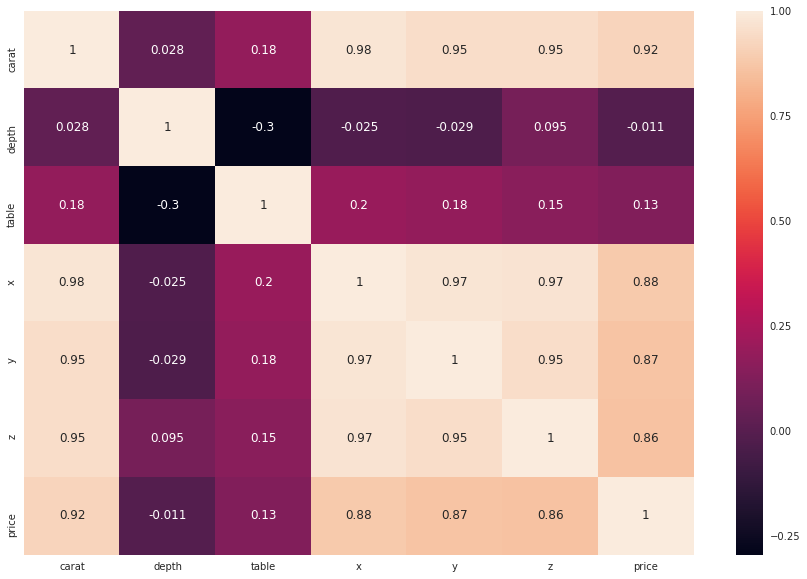

In [29]:
plt.figure(figsize=(15, 10))
sns.heatmap(dataset.corr(), annot=True)
